In [ ]:
import pandas as pd
loan_data = pd.read_csv("/content/loan_data.csv")
print(loan_data.shape)
loan_data.head(100)

(100, 14)


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,debt_consolidation,0.0775,156.11,10.714418,5.00,762,2131.000000,1359,5.6,2,0,0,0
96,1,debt_consolidation,0.1154,329.95,12.323856,20.00,727,10292.000000,107501,44.8,2,0,0,0
97,1,all_other,0.0807,313.67,12.061047,0.72,787,8010.000000,3054,5.6,3,0,0,0
98,1,all_other,0.0807,297.99,11.407565,2.44,792,8717.958333,40384,9.6,0,0,0,0


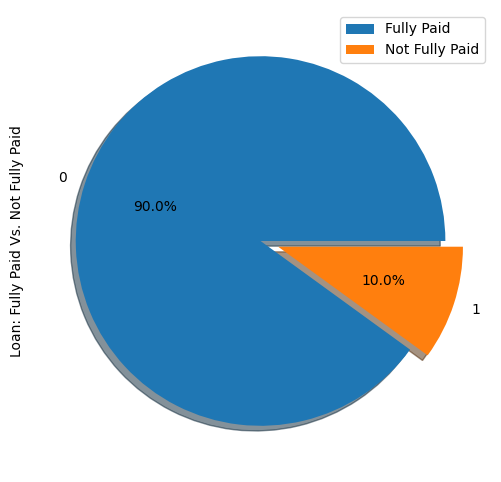

In [ ]:
import matplotlib.pyplot as plt
# Helper function for data distribution
# Visualize the proportion of borrowers
def show_loan_distrib(data):
  count = ""
  if isinstance(data, pd.DataFrame):
      count = data["not.fully.paid"].value_counts()
  else:
      count = data.value_counts()


  count.plot(kind = 'pie', explode = [0, 0.1],

              figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
  plt.ylabel("Loan: Fully Paid Vs. Not Fully Paid")
  plt.legend(["Fully Paid", "Not Fully Paid"])
  plt.show()


# Visualize the proportion of borrowers
show_loan_distrib(loan_data)

In [ ]:
loan_data.isnull().sum()

,0
credit.policy,0
purpose,0
int.rate,0
installment,0
log.annual.inc,0
dti,0
fico,0
days.with.cr.line,0
revol.bal,0
revol.util,0


In [ ]:
# Check column types
print(loan_data.dtypes)

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object


In [ ]:
encoded_loan_data = pd.get_dummies(loan_data, prefix="purpose",

                                   drop_first=True)
print(encoded_loan_data.dtypes)

credit.policy                   int64
int.rate                      float64
installment                   float64
log.annual.inc                float64
dti                           float64
fico                            int64
days.with.cr.line             float64
revol.bal                       int64
revol.util                    float64
inq.last.6mths                  int64
delinq.2yrs                     int64
pub.rec                         int64
not.fully.paid                  int64
purpose_credit_card              bool
purpose_debt_consolidation       bool
purpose_educational              bool
purpose_home_improvement         bool
purpose_major_purchase           bool
purpose_small_business           bool
dtype: object


In [ ]:
from sklearn.model_selection import train_test_split
X = encoded_loan_data.drop('not.fully.paid', axis = 1)
y = encoded_loan_data['not.fully.paid']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,

                                           stratify = y, random_state=2022)

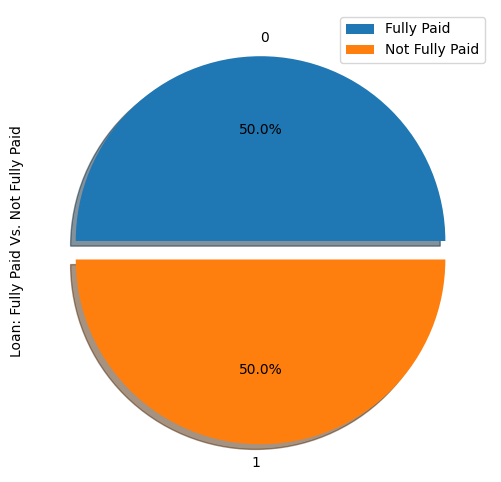

In [ ]:
import seaborn as sa
X_train_cp = X_train.copy()
X_train_cp['not.fully.paid'] = y_train
y_0 = X_train_cp[X_train_cp['not.fully.paid'] == 0]
y_1 = X_train_cp[X_train_cp['not.fully.paid'] == 1]
y_0_undersample = y_0.sample(y_1.shape[0])
loan_data_undersample = pd.concat([y_0_undersample, y_1], axis = 0)


# Visualize the proportion of borrowers
show_loan_distrib(loan_data_undersample)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.utils import resample

# Load your data
loan_data = pd.read_csv("/content/loan_data.csv")

# Preprocess the data (example)
encoded_loan_data = pd.get_dummies(loan_data, prefix="purpose", drop_first=True)
X = encoded_loan_data.drop('not.fully.paid', axis=1)
y = encoded_loan_data['not.fully.paid']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=2022)

# Random Oversampling
X_train_combined = pd.concat([X_train, y_train], axis=1)
majority_class = X_train_combined[X_train_combined['not.fully.paid'] == 0]
minority_class = X_train_combined[X_train_combined['not.fully.paid'] == 1]

# Randomly duplicate the minority class instances
minority_upsampled = resample(minority_class,
                              replace=True,     # Sample with replacement
                              n_samples=len(majority_class),  # Match the majority class
                              random_state=2022) # Reproducible results

# Combine majority class with upsampled minority class
upsampled = pd.concat([majority_class, minority_upsampled])

# Separate back into X and y
X_train_upsampled = upsampled.drop('not.fully.paid', axis=1)
y_train_upsampled = upsampled['not.fully.paid']

# Step 1: Fit your model (example with Random Forest)
model = RandomForestClassifier(class_weight='balanced', random_state=2022)
model.fit(X_train_upsampled, y_train_upsampled)  # Use upsampled data

# Step 2: Make predictions
y_pred = model.predict(X_test)

# Step 3: Evaluate performance
# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
report = classification_report(y_test, y_pred)
print(report)

# Optional: Print confusion matrix for more insights
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        27
           1       0.00      0.00      0.00         3

    accuracy                           0.87        30
   macro avg       0.45      0.48      0.46        30
weighted avg       0.81      0.87      0.84        30

Confusion Matrix:
[[26  1]
 [ 3  0]]


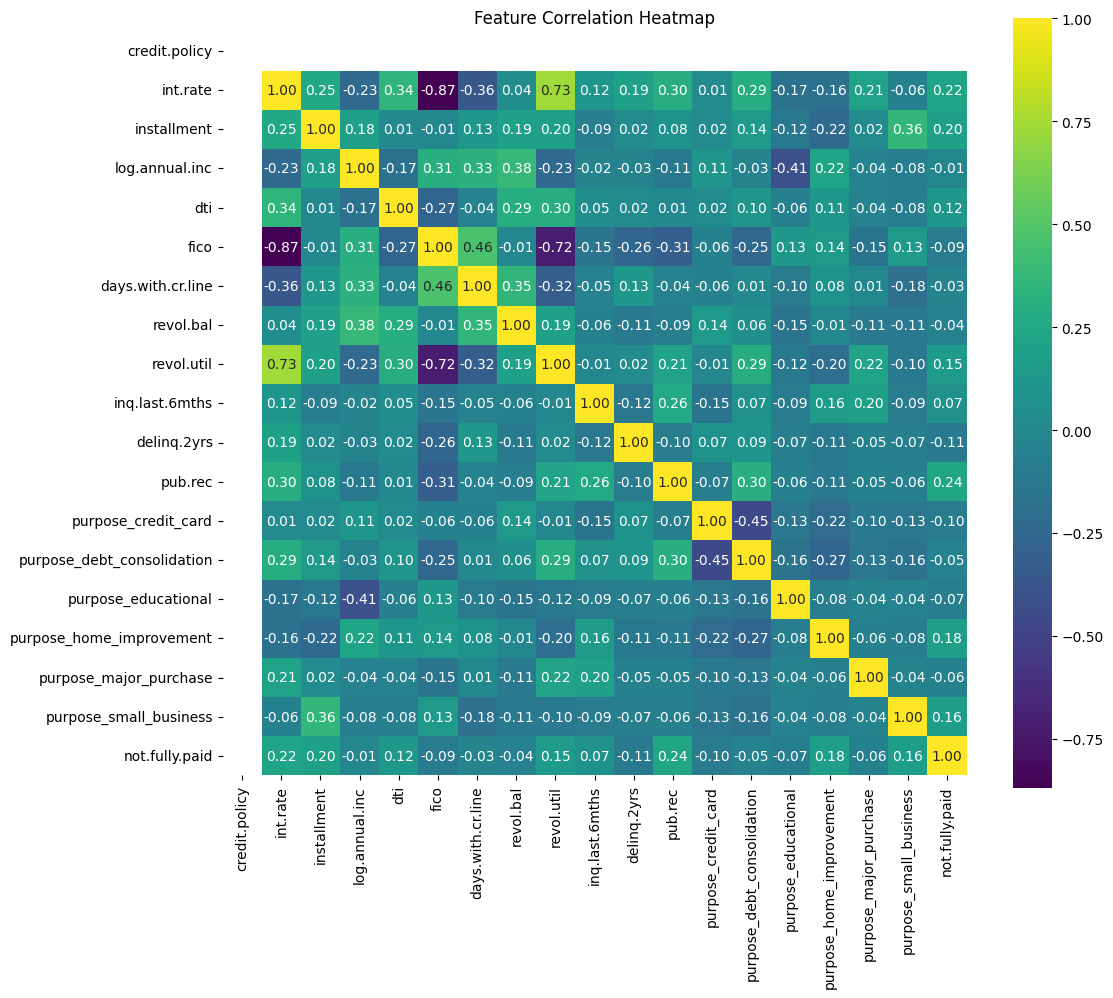

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create the correlation matrix
correlation_matrix = X_train_cp.corr()

# Step 2: Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Step 3: Create the heatmap
#sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='viridis', square=True, cbar=True)


# Step 4: Set titles and labels
plt.title('Feature Correlation Heatmap')
plt.show()


In [ ]:
loan_data.describe()
# to get summary statistics of numerical features.

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,1.0,0.101028,227.940000,11.079282,9.035000,726.600000,4562.093750,17009.490000,35.50000,0.770000,0.130000,0.060000,0.100000
std,0.0,0.023150,162.367679,0.715795,5.981154,44.854873,2630.856598,22933.459903,26.17237,1.033333,0.393251,0.238683,0.301511
min,1.0,0.071400,32.550000,8.987197,0.000000,627.000000,1110.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.080700,124.745000,10.596635,3.662500,682.000000,2684.968750,3141.750000,14.30000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.096400,160.615000,11.156251,8.310000,722.000000,4253.979166,6678.500000,31.55000,0.000000,0.000000,0.000000,0.000000
75%,1.0,0.115400,301.910000,11.512925,14.395000,763.250000,5840.000000,22254.500000,53.65000,1.000000,0.000000,0.000000,0.000000
max,1.0,0.159600,829.100000,12.429216,22.090000,812.000000,14008.958330,128000.000000,93.40000,4.000000,2.000000,1.000000,1.000000


In [ ]:
loan_data.info()
# to check for missing values and data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      100 non-null    int64  
 1   purpose            100 non-null    object 
 2   int.rate           100 non-null    float64
 3   installment        100 non-null    float64
 4   log.annual.inc     100 non-null    float64
 5   dti                100 non-null    float64
 6   fico               100 non-null    int64  
 7   days.with.cr.line  100 non-null    float64
 8   revol.bal          100 non-null    int64  
 9   revol.util         100 non-null    float64
 10  inq.last.6mths     100 non-null    int64  
 11  delinq.2yrs        100 non-null    int64  
 12  pub.rec            100 non-null    int64  
 13  not.fully.paid     100 non-null    int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 11.1+ KB


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.90      1.00      0.95        27
           1       0.00      0.00      0.00         3

    accuracy                           0.90        30
   macro avg       0.45      0.50      0.47        30
weighted avg       0.81      0.90      0.85        30

[[27  0]
 [ 3  0]]


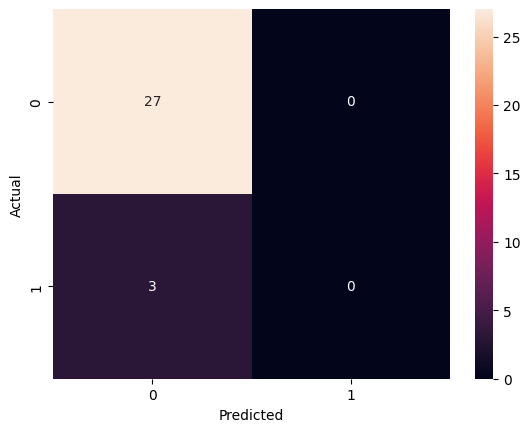

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Instantiate the model
model = RandomForestClassifier(random_state=2022)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Visualize the confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
